<a href="https://colab.research.google.com/github/Anandharajan/DriverBehaviour/blob/master/DriverBehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/Anandharajan/DriverBehaviour/master/driver.csv")

In [0]:
print(train.shape)

(37, 11)


In [0]:
print(train.columns.values)

['ag' ' brac' ' brake' ' steering' ' aj' ' acceleration' ' yawrate'
 ' engineSpeed' ' longacc' ' transacc' ' accident']


In [0]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
ag               37 non-null int64
 brac            37 non-null object
 brake           37 non-null int64
 steering        37 non-null int64
 aj              37 non-null int64
 acceleration    37 non-null int64
 yawrate         37 non-null int64
 engineSpeed     37 non-null int64
 longacc         37 non-null int64
 transacc        37 non-null int64
 accident        37 non-null int64
dtypes: int64(10), object(1)
memory usage: 3.3+ KB
None


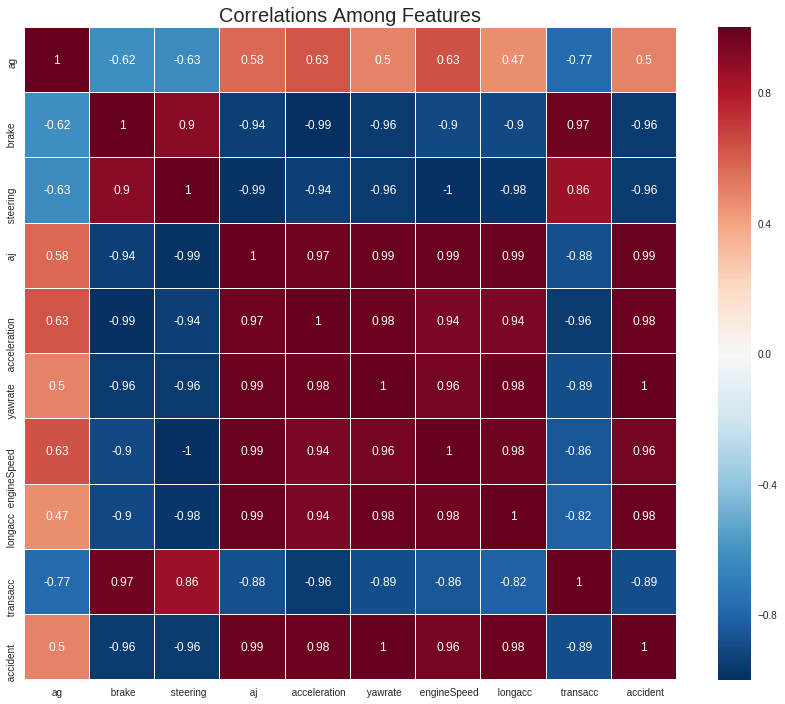

In [0]:
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);
plt.show()

In [0]:
mask = np.random.rand(len(df)) < args.train_size
train_df = df[mask]
test_df = df[~mask]
print ("Train size: {0}, test size: {1}".format(len(train_df), len(test_df)))

Train size: 28, test size: 9


In [0]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib

In [0]:
# Import packages
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# Preprocessing
def preprocess(df):
  
    # Drop rows with NaN values
    df = df.dropna()

    # Drop text based features (we'll learn how to use them in later lessons)
    feature_to_drop = ["brac"]
    df = df.drop(features_to_drop, axis=1)

    return df

In [0]:
# Preprocess the dataset
df = preprocess(df)
df.head()

NameError: ignored

In [0]:
mask = np.random.rand(len(df)) < args.train_size
train_df = df[mask]
test_df = df[~mask]
print ("Train size: {0}, test size: {1}".format(len(train_df), len(test_df)))

Train size: 28, test size: 9


In [0]:
X_train = train_df.drop(["brac"], axis=1)
y_train = train_df["accident"]
X_test = test_df.drop(["brac"], axis=1)
y_test = test_df["accident"]

ValueError: ignored